In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
#df = pd.read_csv('/home/djc/Documents/MachineLearning/MLProject/dataset/SampleCSVFile_2kb.csv', encoding = "ISO-8859-1")
df = pd.read_csv('/home/djc/Documents/MachineLearning/MLProject/dataset/DataHF0.1.csv', encoding = "ISO-8859-1")
df.head()

,SUBJNO,Instituaion_Code,BB_slowHR_EnrollYn,BB_pEF_BNP_AliveDSC,ICFDT,SEX,BIRTHDT,AGE,SUBJSTAT,Init_st,...,BNP_100th,NTproBNP_100th,NP_100th,NP_100th_TERTILE_ALL,NP_100th_TERTILE_pEF,NP_100th_QUARTILE_pEF,NP_100th_QUINTILE_pEF,BNP_tertile,NTproBNP_tertile,A1c_quintile
0,002-00673,2,,,12/28/2013,0,1/15/1973,40,Off Study,,...,,,,,,,,,,
1,003-00333,3,,,1/15/2012,0,12/18/1925,86,Off Study,,...,,,,,,,,,,
2,002-00693,2,,,2/10/2014,1,8/15/1944,69,Off Study,,...,,,,,,,,,,1
3,002-00143,2,,,9/27/2011,1,10/29/1941,69,Off Study,,...,,,,,,,,,,
4,002-00502,2,,,12/26/2012,1,4/6/1945,67,Enrolled/Active,,...,,,,,,,,,,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 804 entries, SUBJNO to A1c_quintile
dtypes: float64(24), int64(227), object(553)
memory usage: 132.0+ KB


In [4]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.9]]
del df2['BNP_100th']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: BNP_100th, 



In [5]:
df.head()

,SUBJNO,Instituaion_Code,BB_slowHR_EnrollYn,BB_pEF_BNP_AliveDSC,ICFDT,SEX,BIRTHDT,AGE,SUBJSTAT,Init_st,...,COMMT_CE__v5,NTproBNP_100th,NP_100th,NP_100th_TERTILE_ALL,NP_100th_TERTILE_pEF,NP_100th_QUARTILE_pEF,NP_100th_QUINTILE_pEF,BNP_tertile,NTproBNP_tertile,A1c_quintile
0,002-00673,2,,,12/28/2013,0,1/15/1973,40,Off Study,,...,,,,,,,,,,
1,003-00333,3,,,1/15/2012,0,12/18/1925,86,Off Study,,...,,,,,,,,,,
2,002-00693,2,,,2/10/2014,1,8/15/1944,69,Off Study,,...,,,,,,,,,,1
3,002-00143,2,,,9/27/2011,1,10/29/1941,69,Off Study,,...,,,,,,,,,,
4,002-00502,2,,,12/26/2012,1,4/6/1945,67,Enrolled/Active,,...,,,,,,,,,,


count    21.000000
mean     70.333333
std      14.115004
min      40.000000
25%      67.000000
50%      72.000000
75%      78.000000
max      92.000000
Name: AGE, dtype: float64


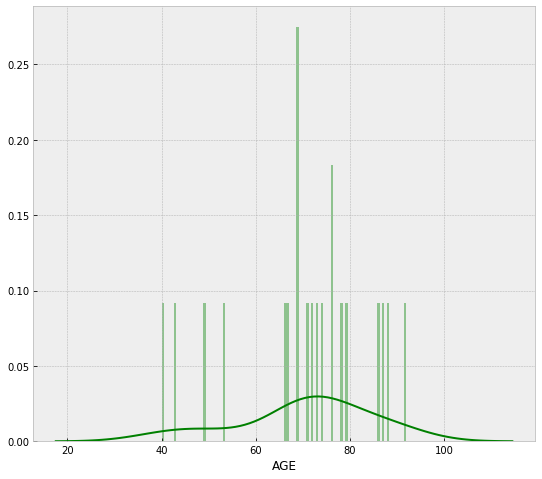

In [6]:
print(df['AGE'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [7]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Instituaion_Code,SEX,AGE,Lung_Cong,LV_dysf,HF_new,HF_type,Ht,Wt,BSA,...,DBP_6m,RASi_discharge_Y1N2_p,MRA_discharge_Y1N2_p,HN_SBP_Prob,SBP_GWTG,BUN_GWTG,Na_GWTG,Age_GWTG,COPD_GWTG,AHFetiology
0,2,0,40,1,1,1,6,165,62,1.68,...,0,2,2,0.362371,28,6,1,8,0,1
1,3,0,86,1,1,1,3,162,55,1.58,...,0,2,2,0.295179,23,4,0,19,0,4
2,2,1,69,1,1,1,3,165,44,1.45,...,0,2,2,0.344928,26,2,1,14,0,2
3,2,1,69,1,1,2,1,150,53,1.47,...,0,2,2,0.243788,17,8,0,14,2,11
4,2,1,67,2,1,2,1,176,64,1.79,...,0,2,1,0.281754,21,2,3,14,2,1


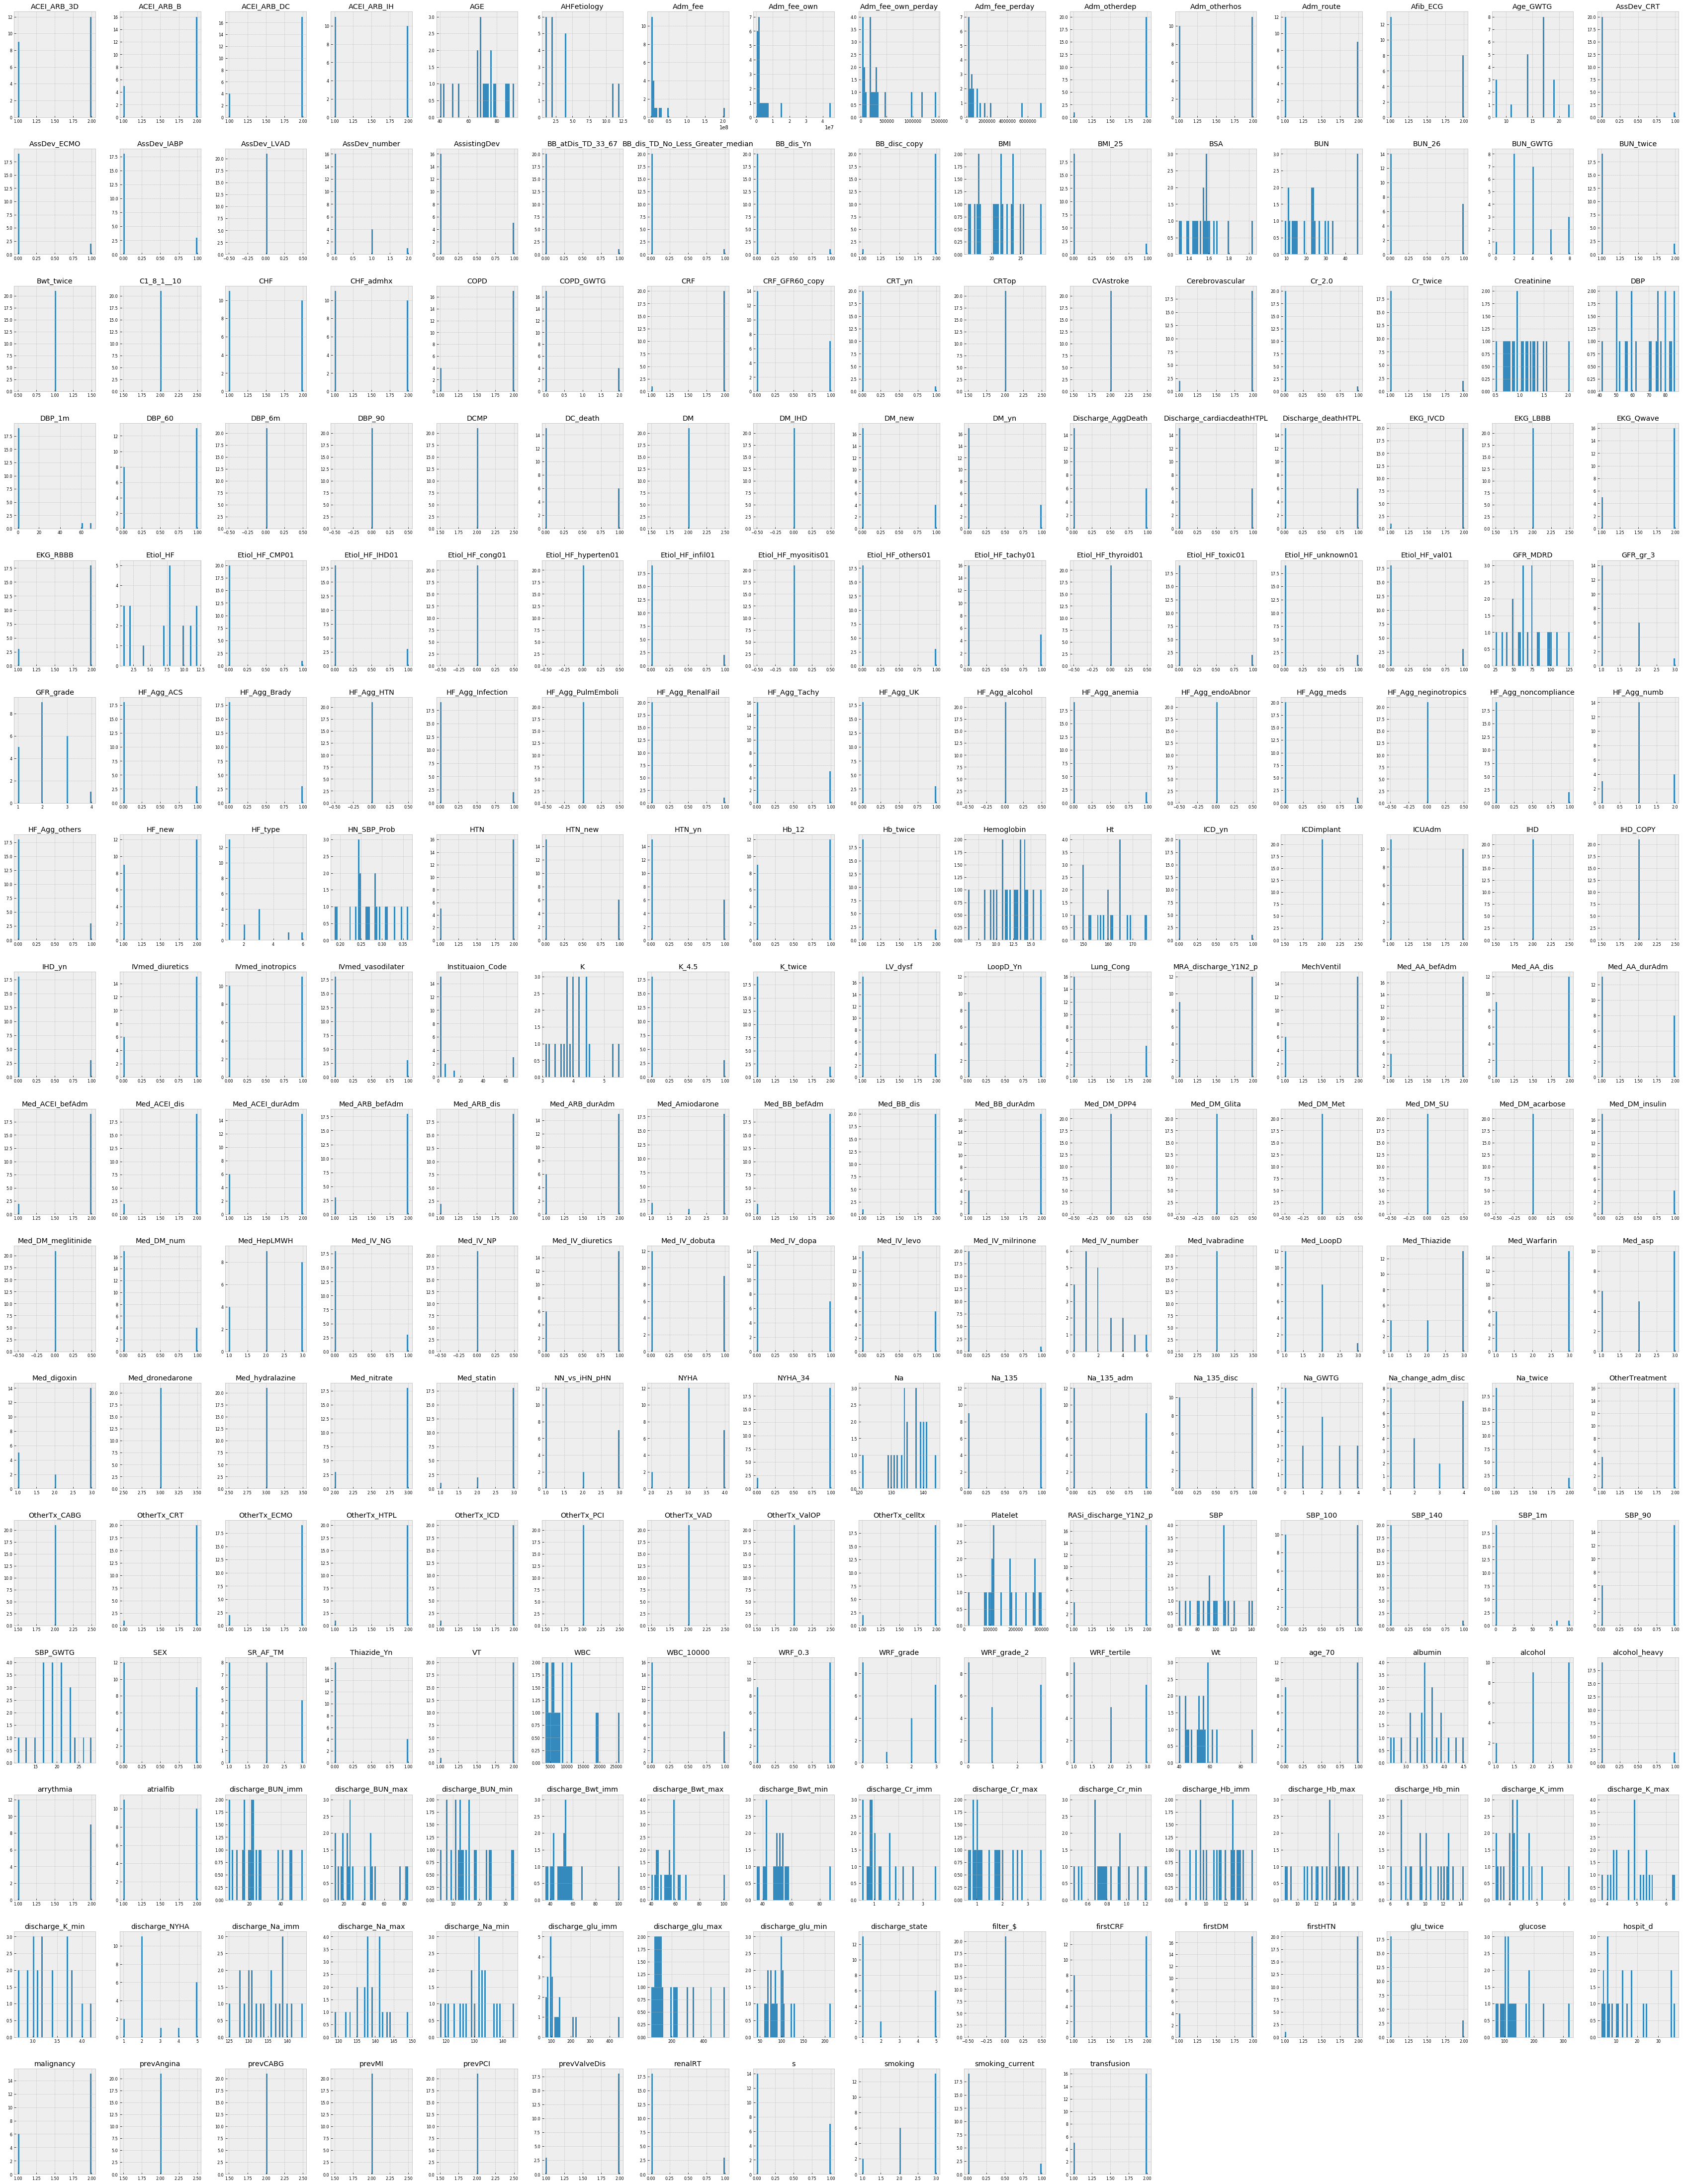

In [36]:
df_num.hist(figsize=(60, 80), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [38]:
df_num_corr = df_num.corr()['discharge_BUN_imm'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with discharge_BUN_imm:\n{}".format(len(golden_features_list), golden_features_list))

There is 23 strongly correlated values with discharge_BUN_imm:
discharge_BUN_imm    1.000000
discharge_BUN_max    0.727306
discharge_Cr_max     0.680442
discharge_BUN_min    0.656329
WRF_grade_2          0.644227
discharge_glu_max    0.612624
WRF_grade            0.597135
HF_type              0.587043
BUN_26               0.585883
discharge_Cr_imm     0.567459
Adm_fee              0.556525
AssDev_number        0.554789
discharge_NYHA       0.544842
WRF_tertile          0.541119
discharge_state      0.534992
Med_IV_milrinone     0.502602
OtherTx_HTPL        -0.502602
transfusion         -0.516356
AGE                 -0.543685
SR_AF_TM            -0.549403
HF_Agg_numb         -0.563578
HF_Agg_Tachy        -0.564209
Platelet            -0.572917
Name: discharge_BUN_imm, dtype: float64


/home/djc/Documents/MachineLearning/MLProject/virtenv/lib64/python3.6/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


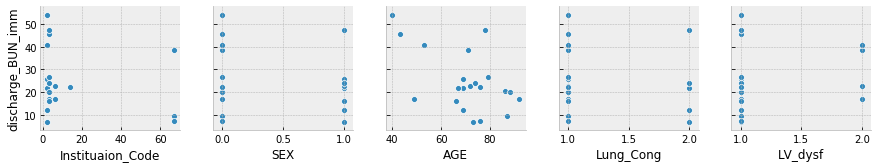

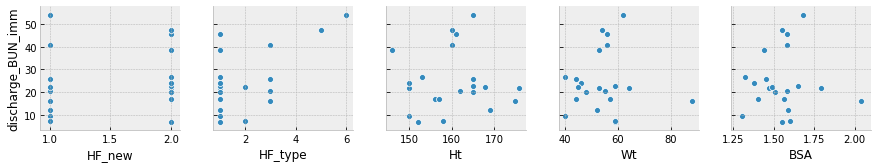

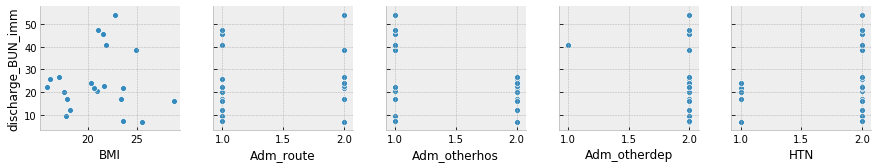

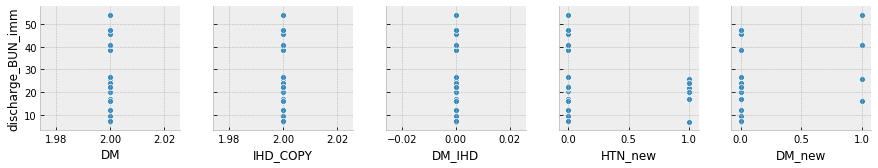

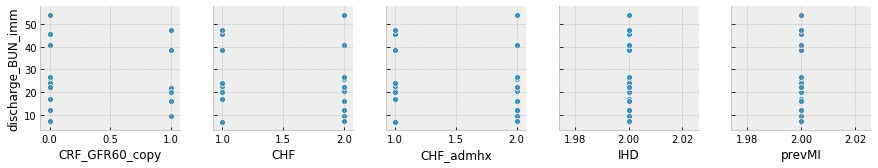

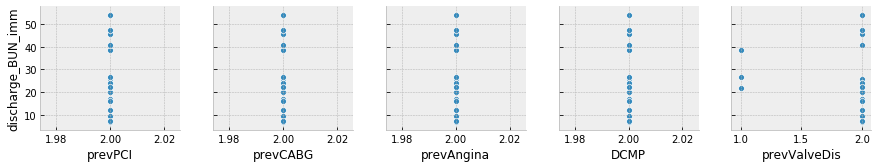

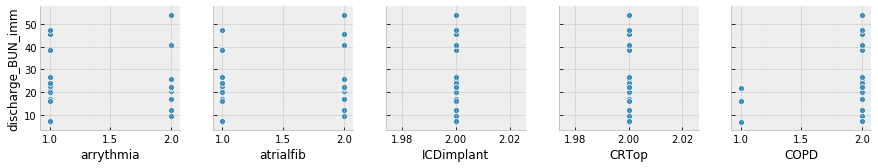

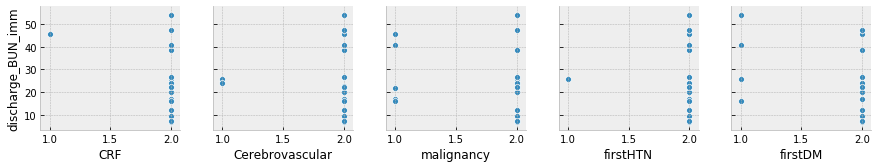

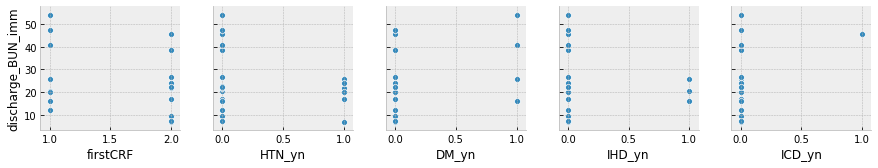

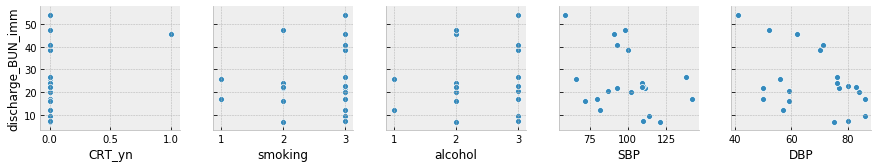

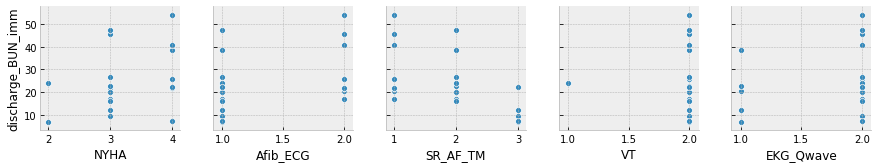

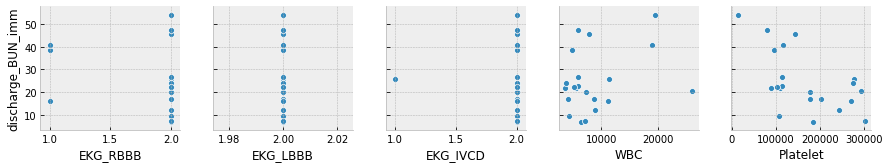

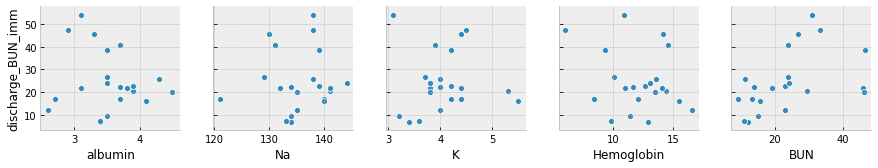

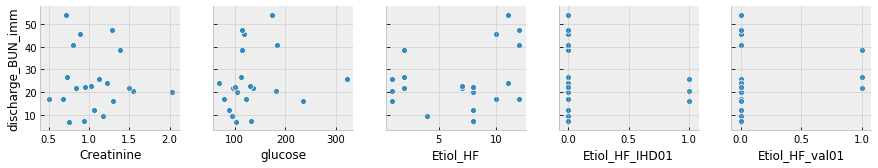

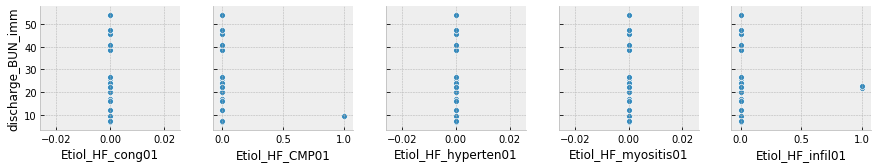

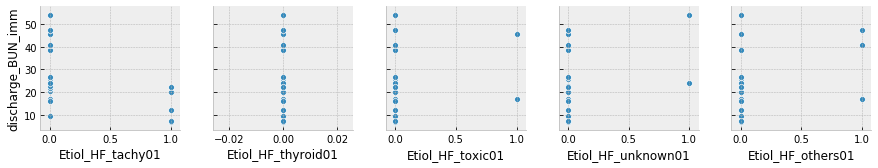

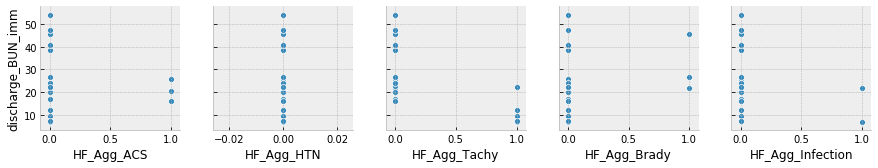

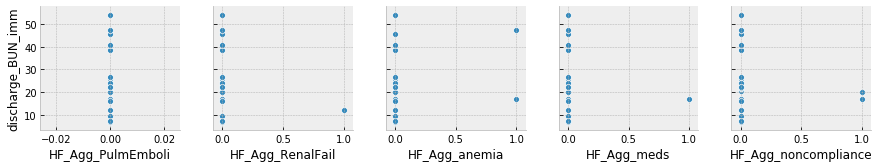

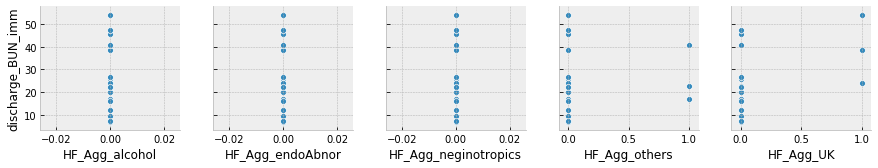

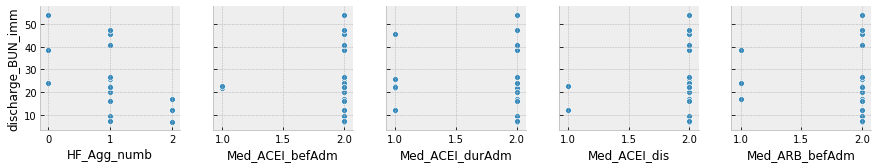

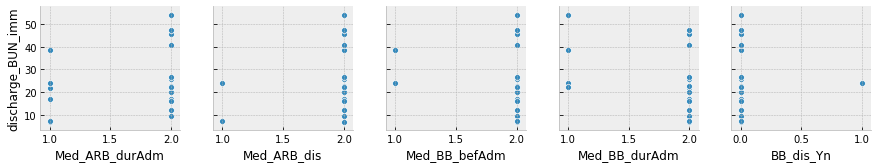

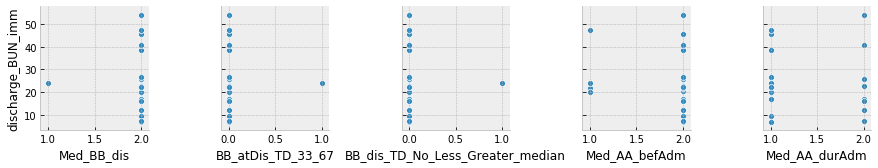

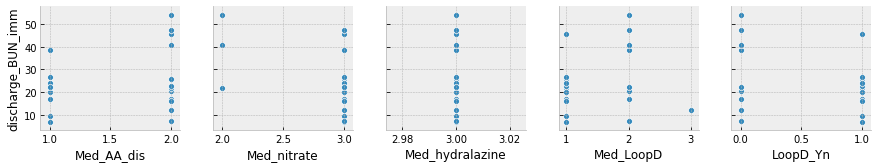

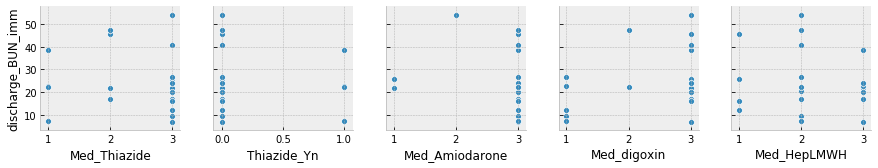

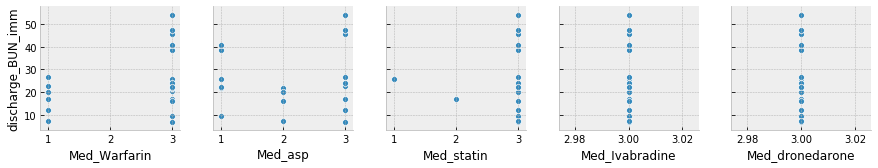

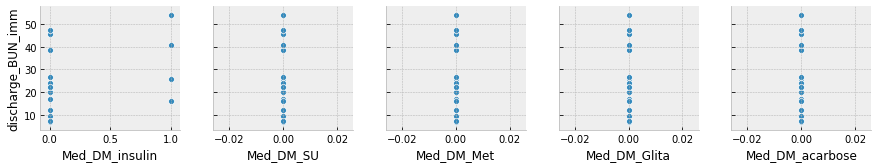

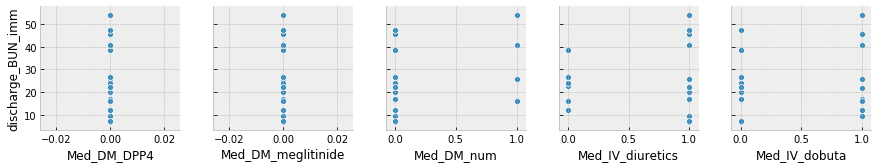

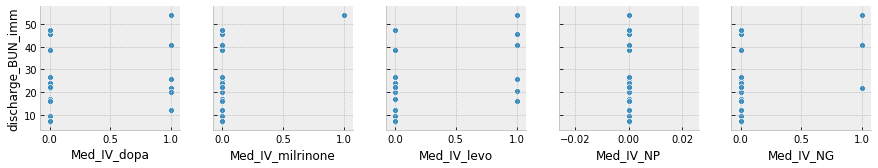

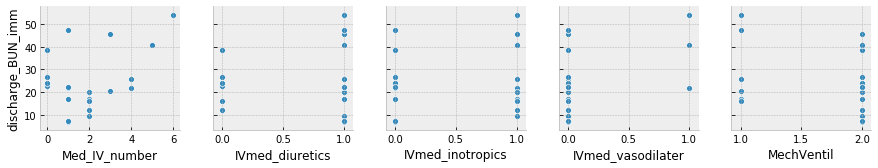

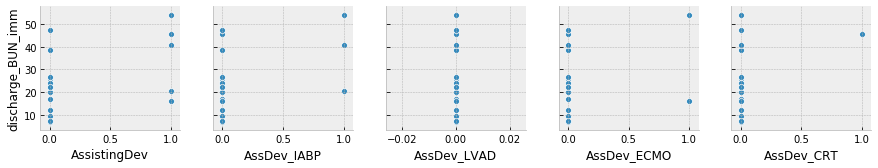

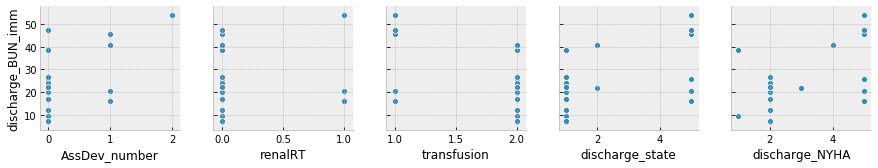

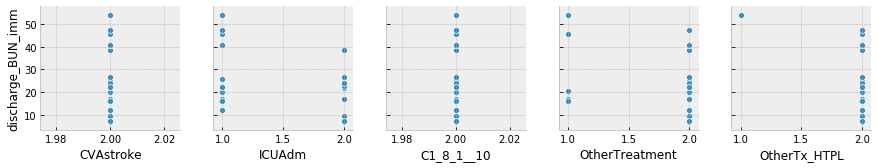

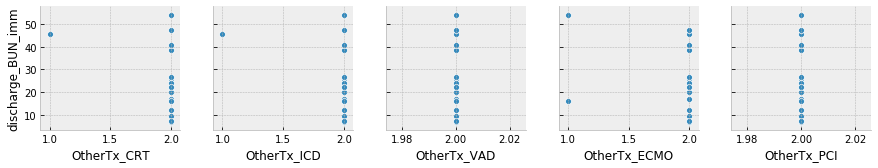

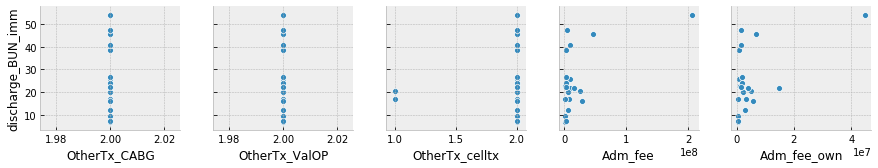

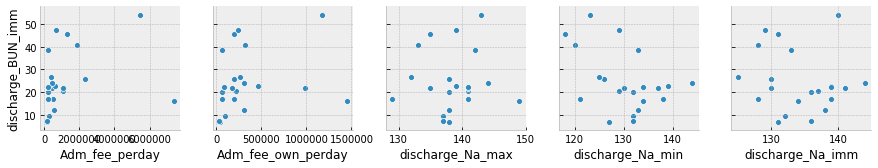

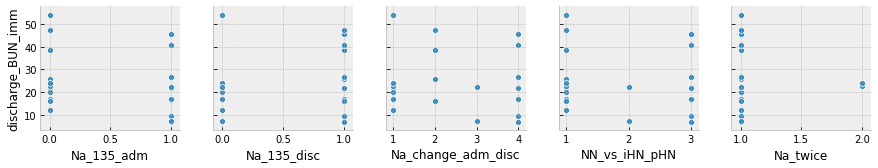

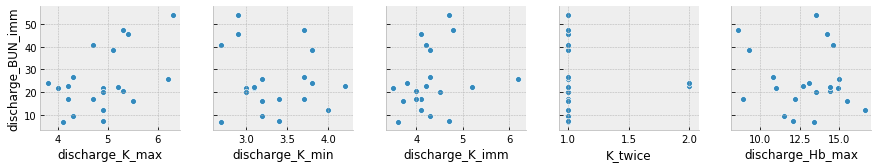

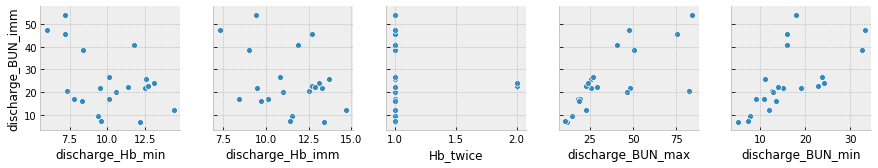

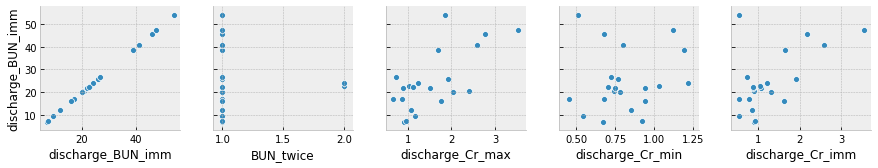

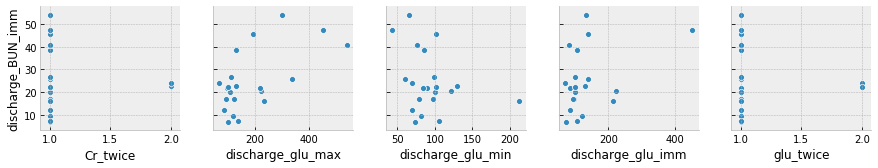

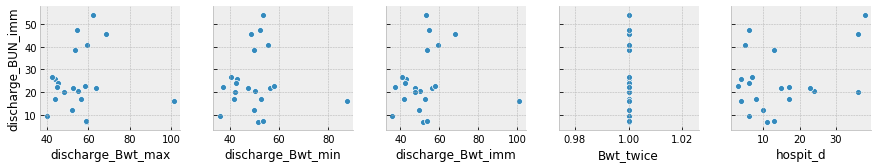

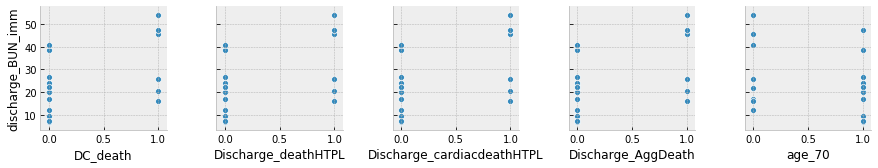

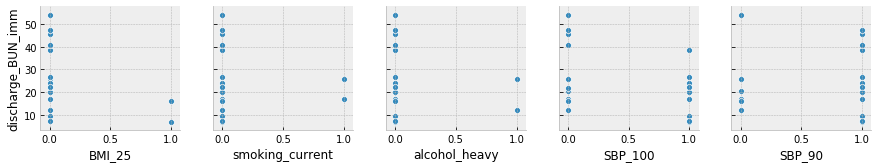

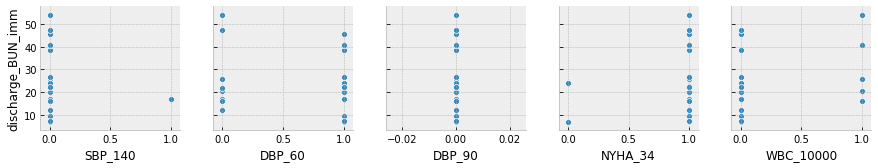

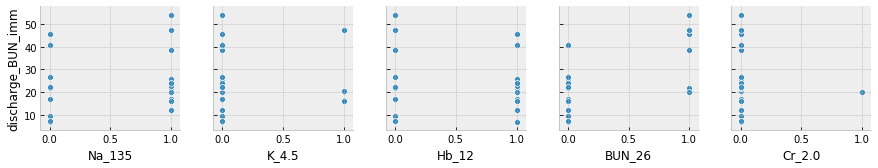

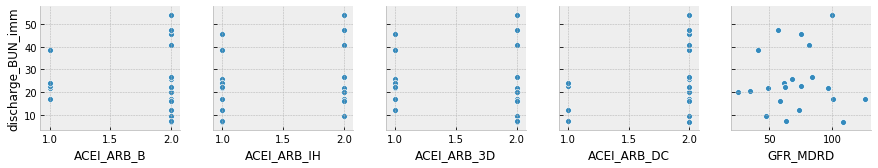

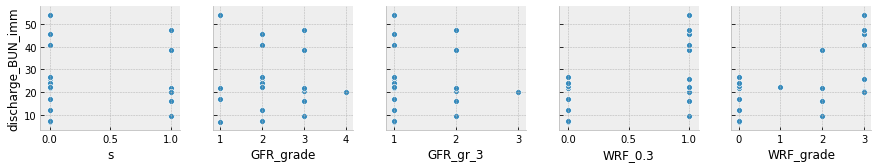

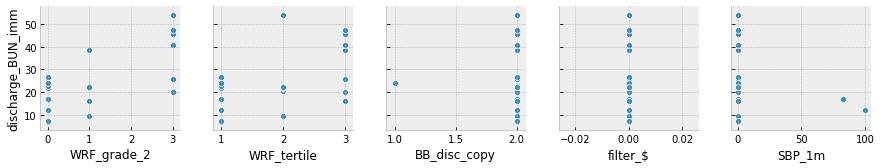

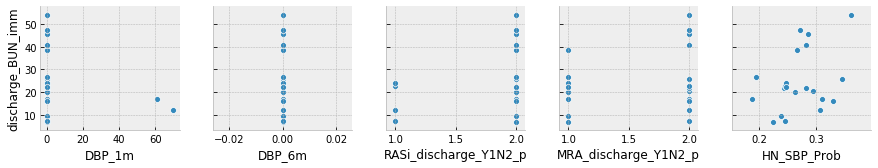

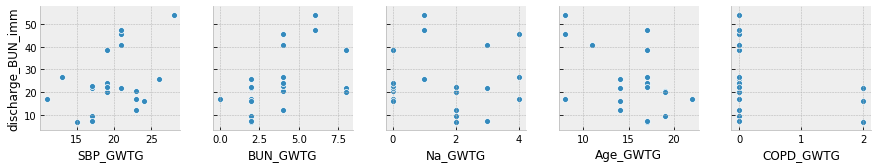

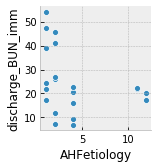

In [39]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['discharge_BUN_imm'])